# Analyse events timing


In [123]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import LabelEncoder

In [124]:
dir_in = './data/'

In [125]:
# Load train data
train = pd.read_csv(os.path.join(dir_in,'gender_age_train.csv'))
groups = train.group.unique()
groups

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [50]:
# Load event data
events = pd.read_csv(os.path.join(dir_in,'events.csv'))
events = events.merge(train, on='device_id', how='inner')
events.head()

,event_id,device_id,timestamp,longitude,latitude,gender,age,group
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46,M39+
1,7104,29182687948017175,2016-05-02 09:37:02,121.38,31.24,M,46,M39+
2,29661,29182687948017175,2016-05-04 00:56:04,121.39,31.23,M,46,M39+
3,33133,29182687948017175,2016-05-06 05:01:15,121.38,31.24,M,46,M39+
4,38980,29182687948017175,2016-05-06 09:55:04,121.16,31.00,M,46,M39+


In [51]:
events['timestamp'] = pd.to_datetime(events['timestamp'])
events['timestamp_h'] = events['timestamp'].dt.hour
events['timestamp_d'] = events['timestamp'].dt.day

In [52]:
events['timestamp_d'][events['timestamp_d']==30]=0

/Users/joostbloom/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
events['timestamp_d'].unique()

array([1, 2, 4, 6, 7, 5, 3, 0, 8])

In [54]:
events['timestamp'] = 100 * events['timestamp_d'] + events['timestamp_h']

In [55]:
events['timestamp'].unique()

array([100, 209, 400, 605, 609, 101, 601, 109, 707, 621, 200, 402, 519,
       105, 306, 600, 102, 106, 606, 302, 520, 118, 607, 506, 213, 521,
       223, 323, 706, 718, 720, 114, 715, 215, 507, 110, 214, 319, 322,
       722, 204, 207, 712, 307, 708, 403, 620, 603, 419, 107, 104, 406,
       300, 219, 211, 103, 208, 217, 710, 619, 423, 604, 516, 111, 401,
       320, 522, 602, 618, 405, 108, 203, 117, 404, 212, 513, 517, 414,
       311, 317, 417, 221, 321, 123, 218, 611, 413, 116, 119, 308, 713,
       113, 120, 309, 415, 510, 719, 623, 501, 310, 416, 121, 122, 502,
       316, 220, 315, 614, 617, 622, 318, 410, 313, 407, 222, 418, 115,
       508, 112, 411, 216, 514, 509, 515, 512, 511, 518,  23, 420, 500,
       504, 714, 421, 723, 721, 711, 709, 505, 705, 608, 701, 422, 503,
       703, 700, 717, 702, 210, 409, 312, 314, 301, 613, 408, 615, 412,
       201, 523, 610, 612, 205, 304, 716, 206, 616, 305, 303, 202, 704, 800])

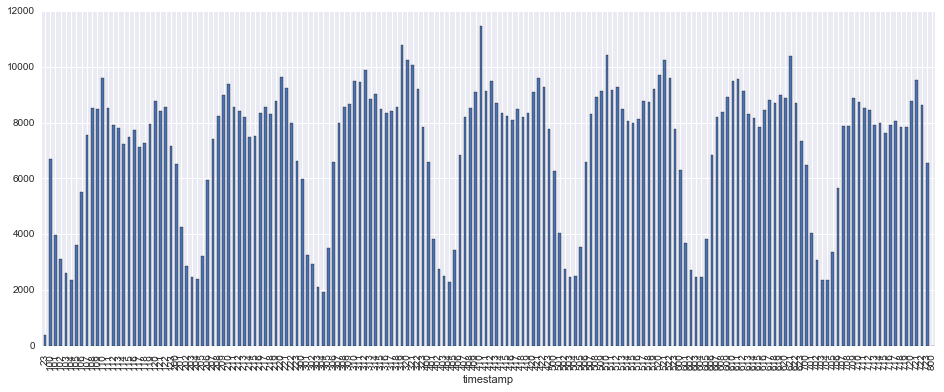

In [56]:
events.groupby('timestamp').size().plot(kind='bar', figsize=(16,6))

In [57]:
events_per_group = events.groupby(['group','timestamp']).size().unstack('group')

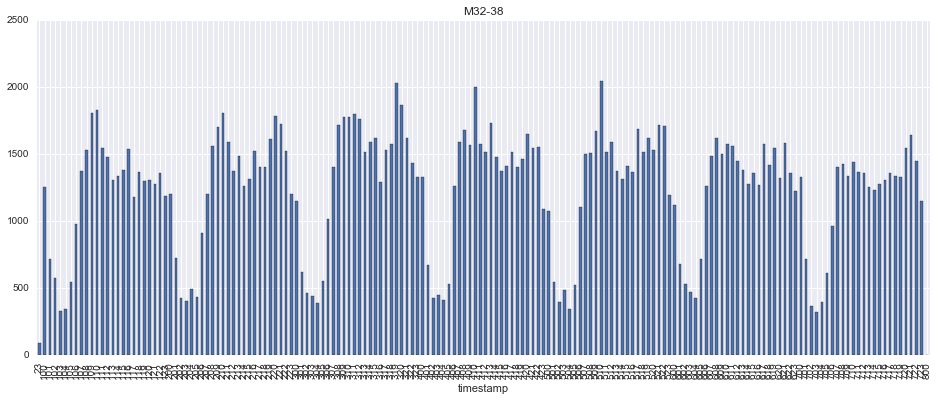

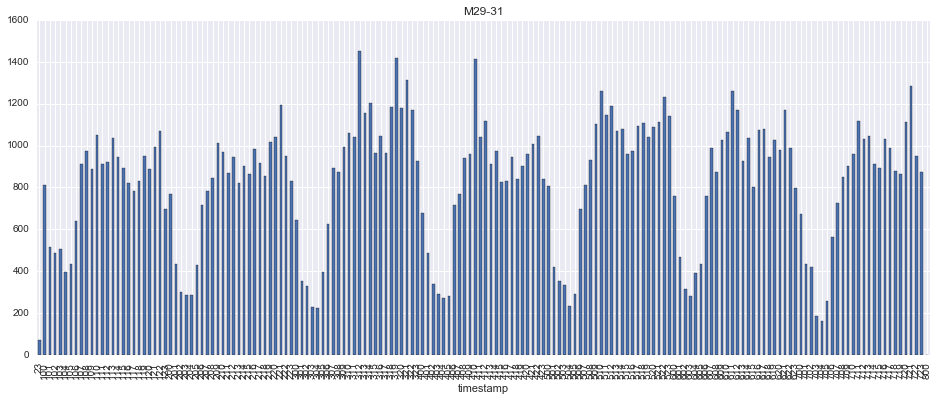

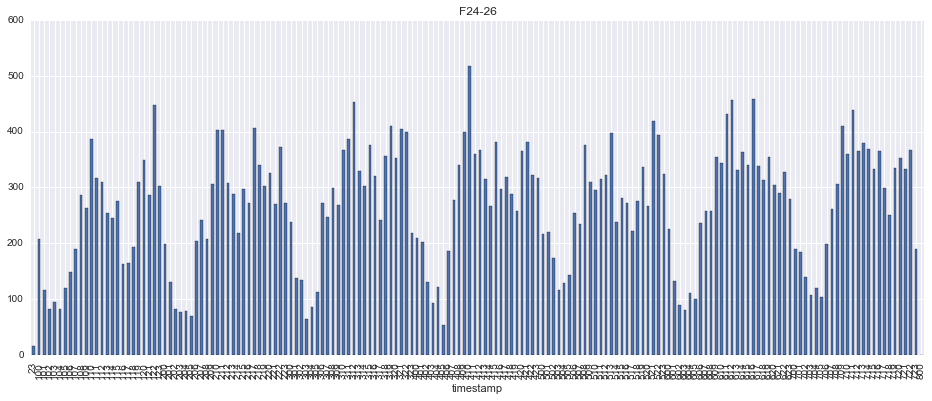

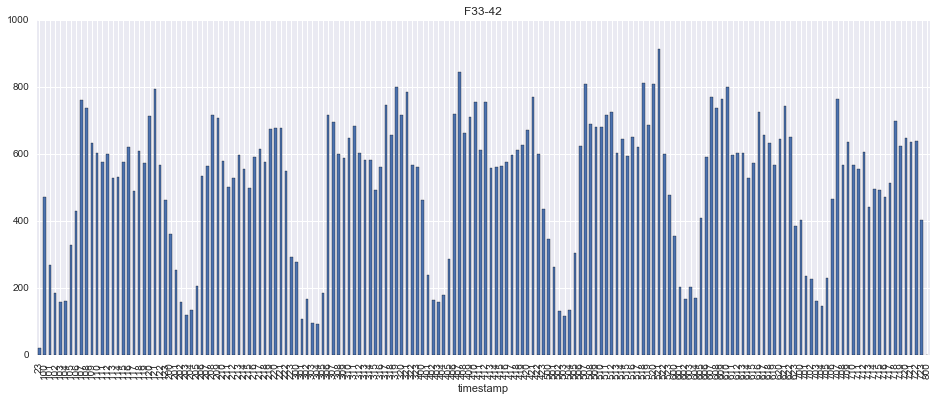

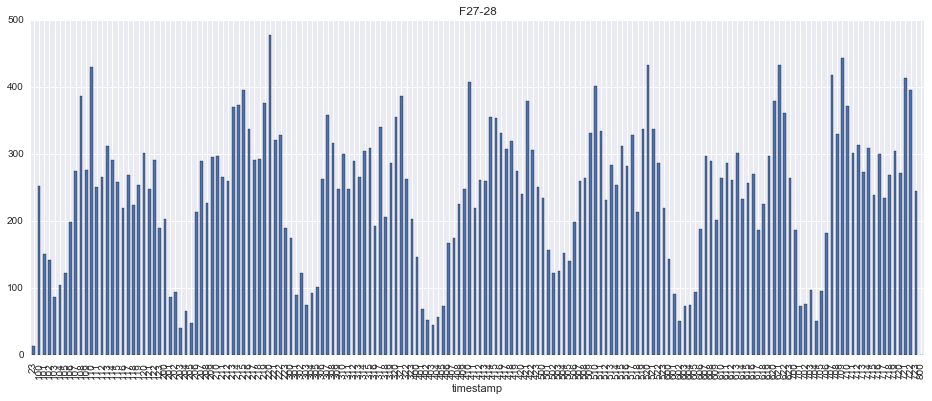

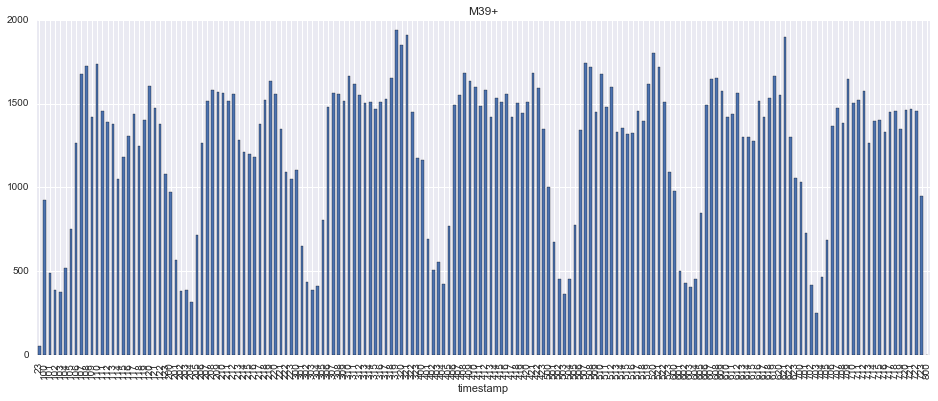

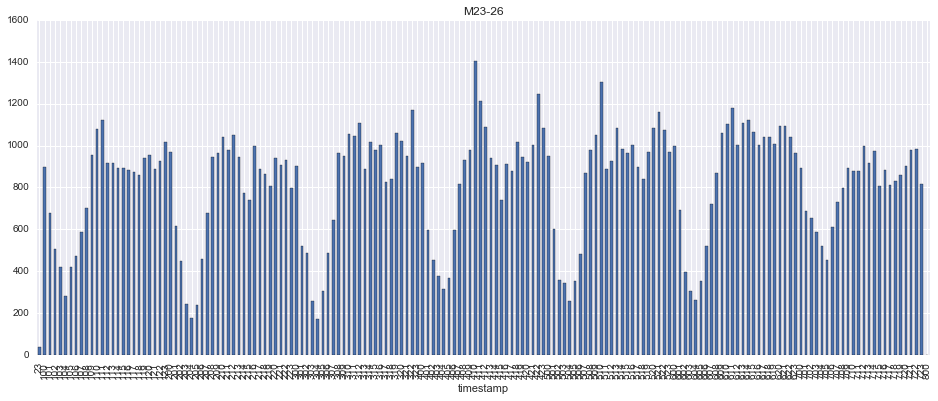

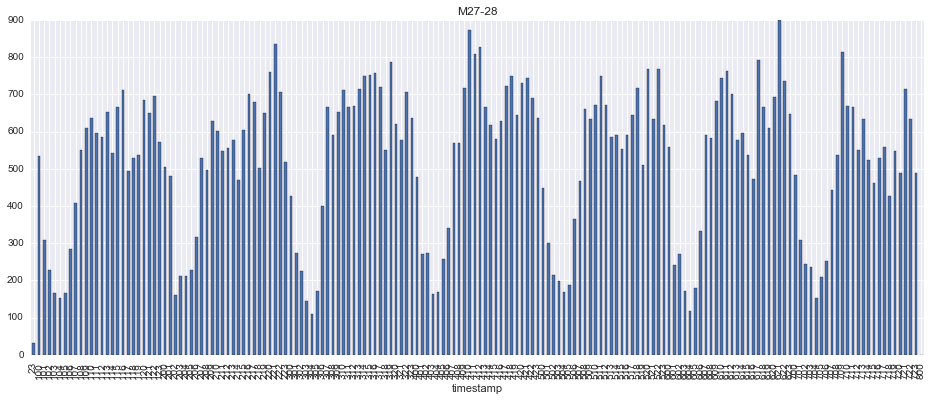

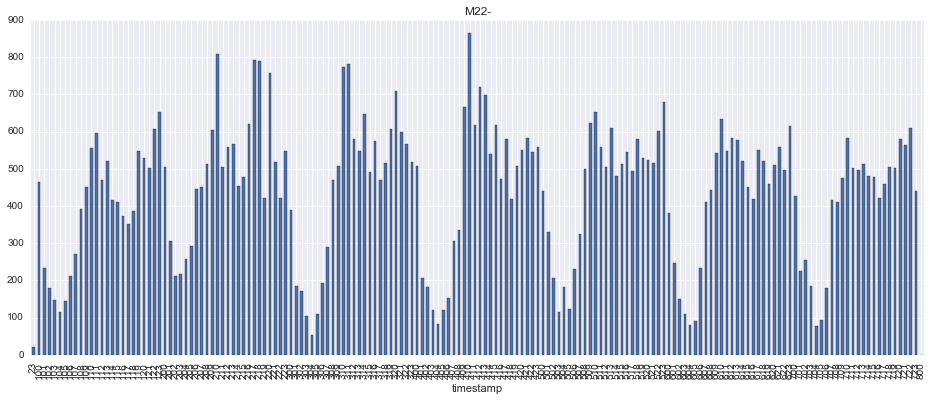

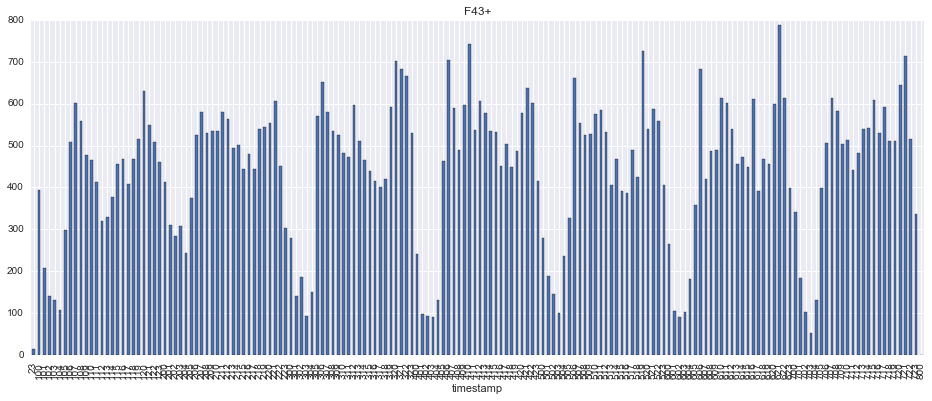

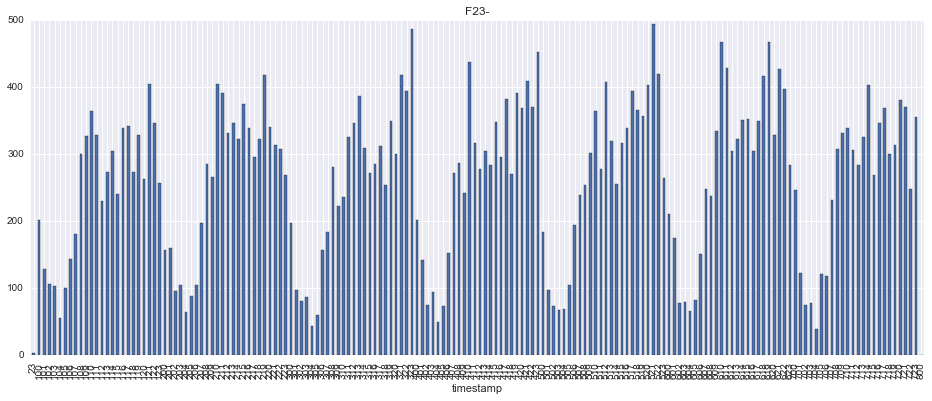

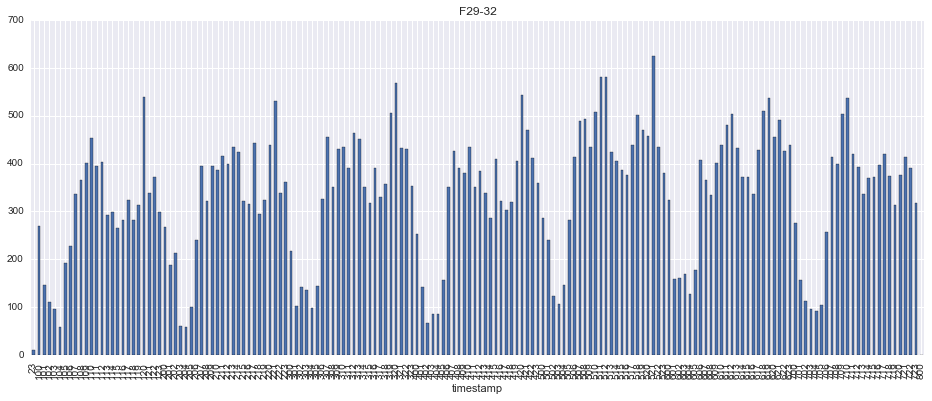

In [59]:
for g in groups:
    plt.figure()
    events_per_group[g].plot(kind='bar', figsize=(16,6))
    plt.title(g)

In [73]:
events_mu = events.groupby(['group','timestamp']).size().unstack('group').mean(axis=1)
events_mu.head()

timestamp
23      31.500000
100    557.416667
101    330.083333
102    260.833333
103    217.666667
dtype: float64

In [81]:
events_per_group_mu = events.groupby(['group','timestamp']).size().unstack('group')

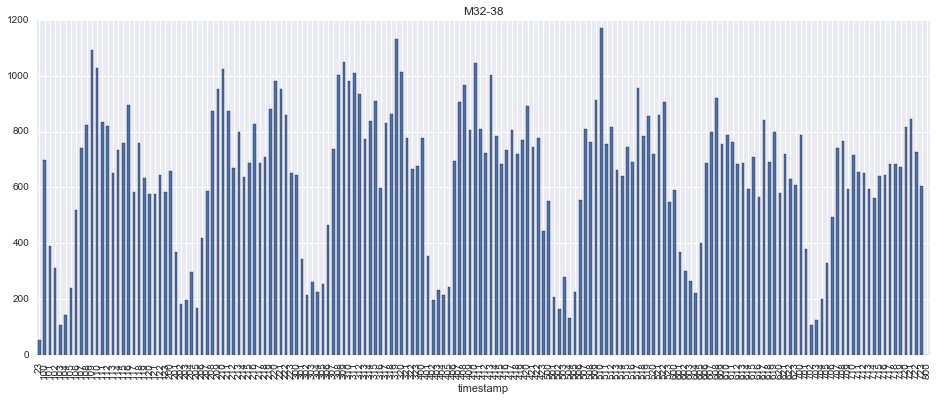

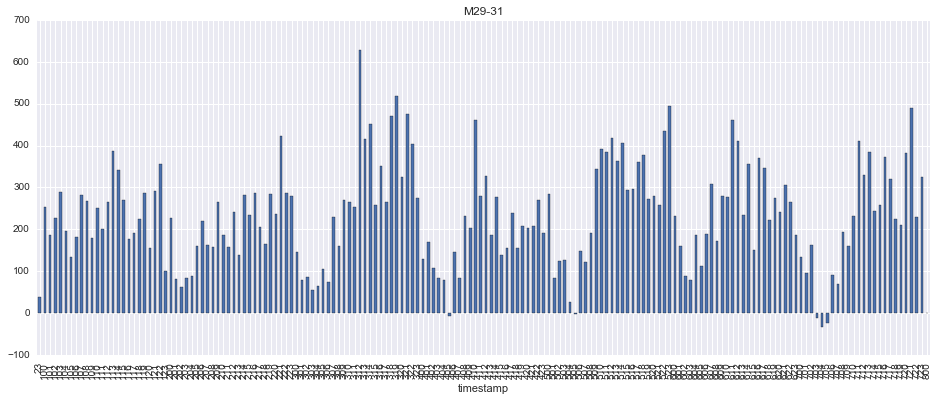

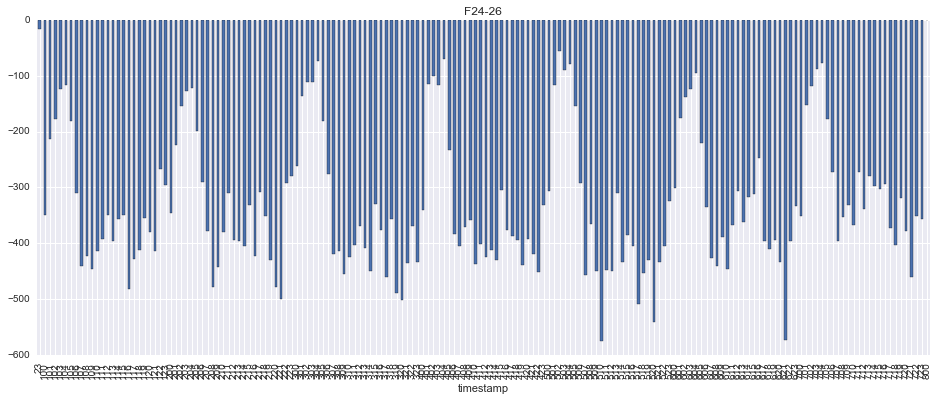

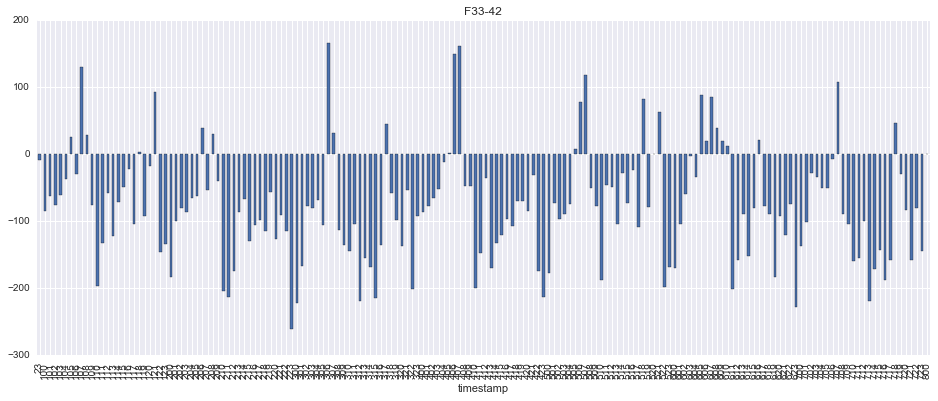

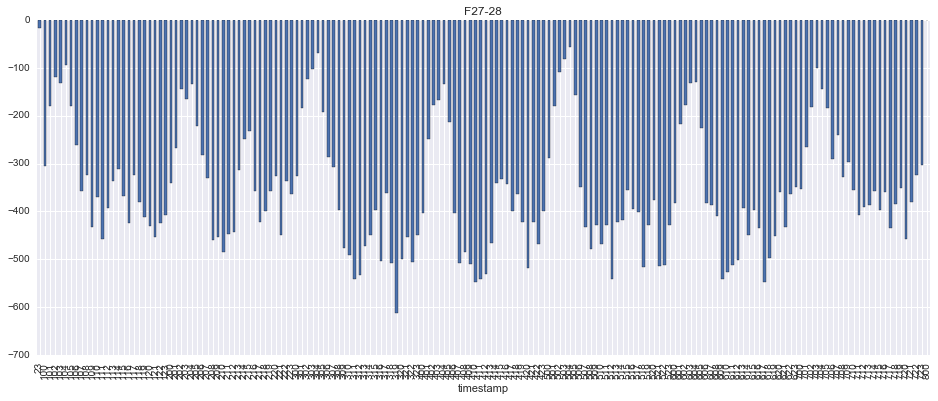

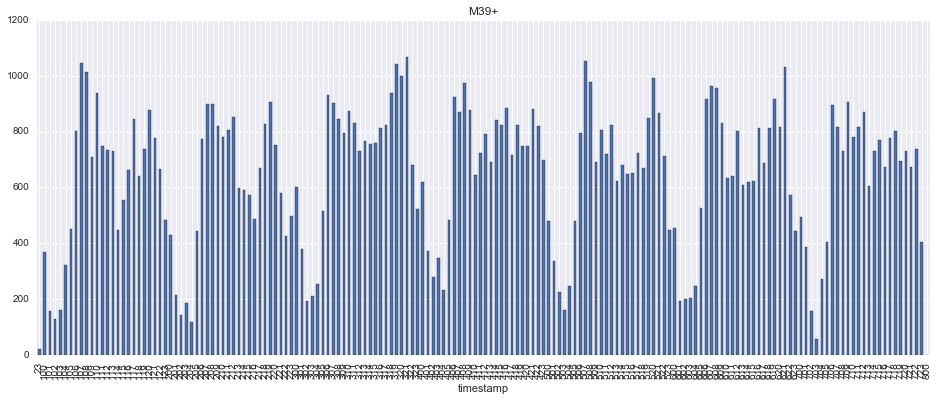

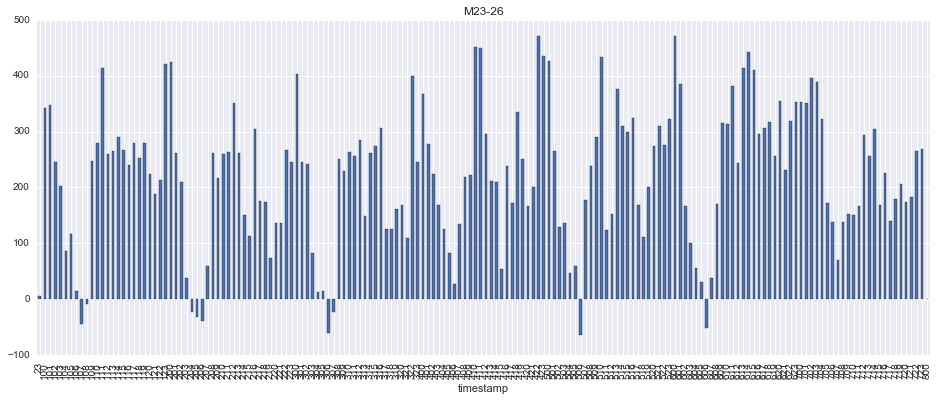

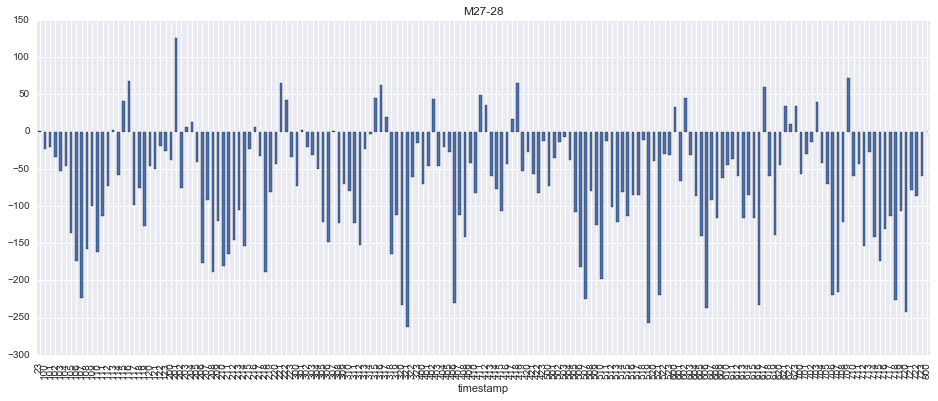

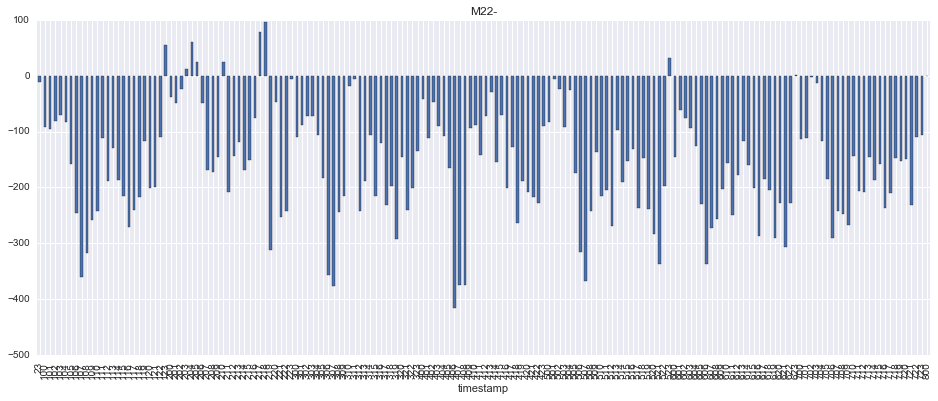

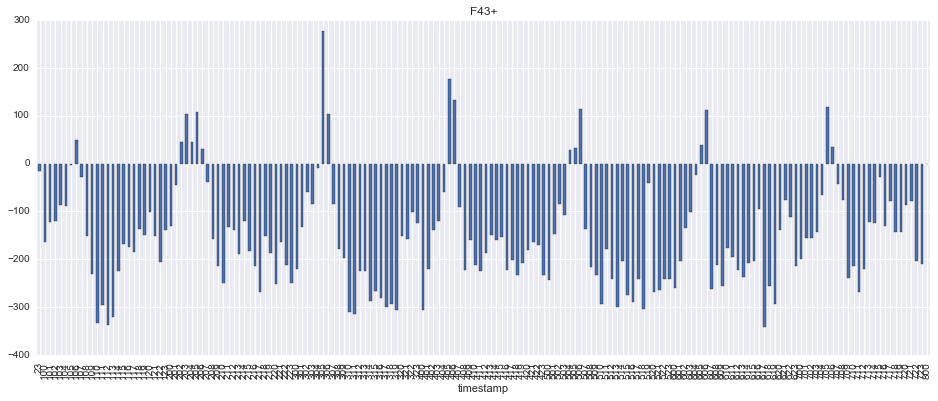

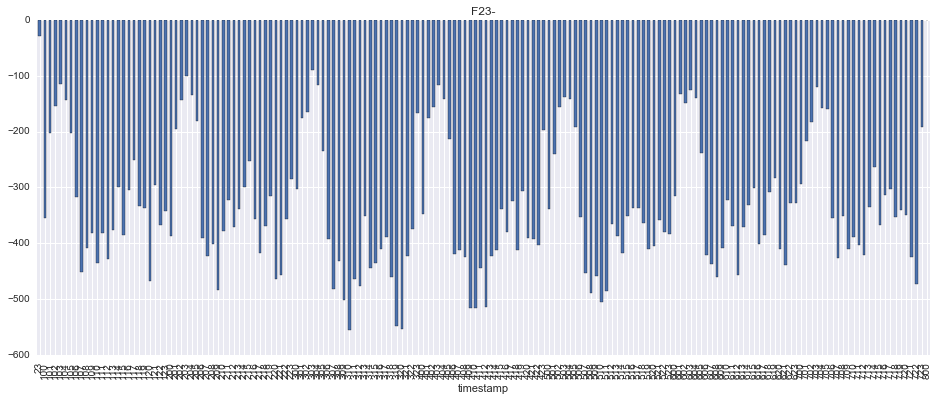

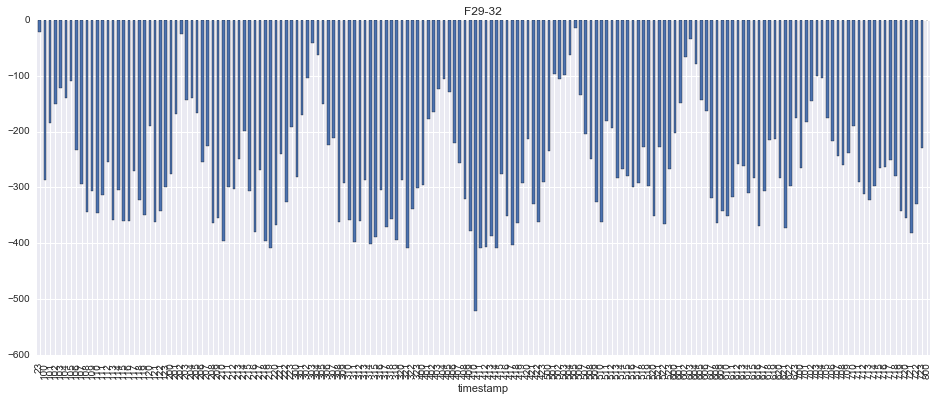

In [82]:
for g in groups:
    plt.figure()
    (events_per_group_mu[g]-events_mu).plot(kind='bar', figsize=(16,6))
    plt.title(g)

## Events per hour

In [78]:
events_hour_per_group = events.groupby(['group','timestamp_h']).size().unstack('group')

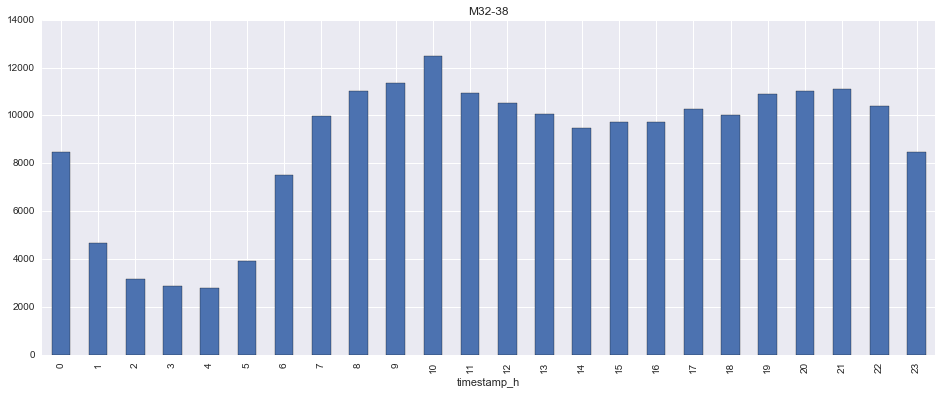

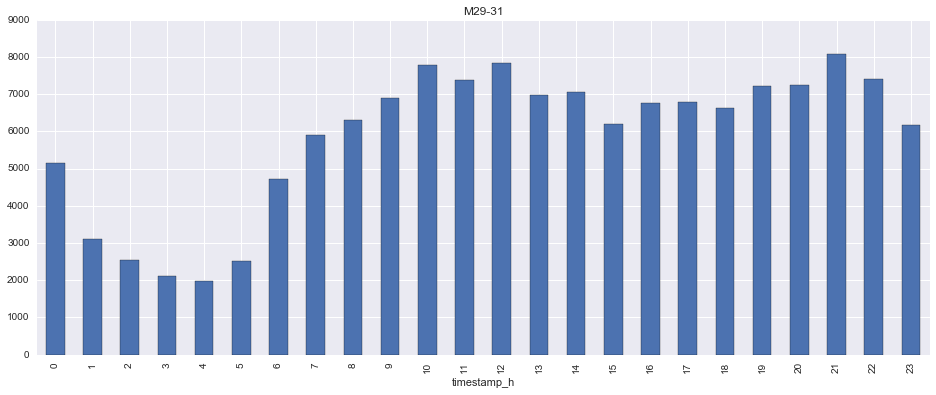

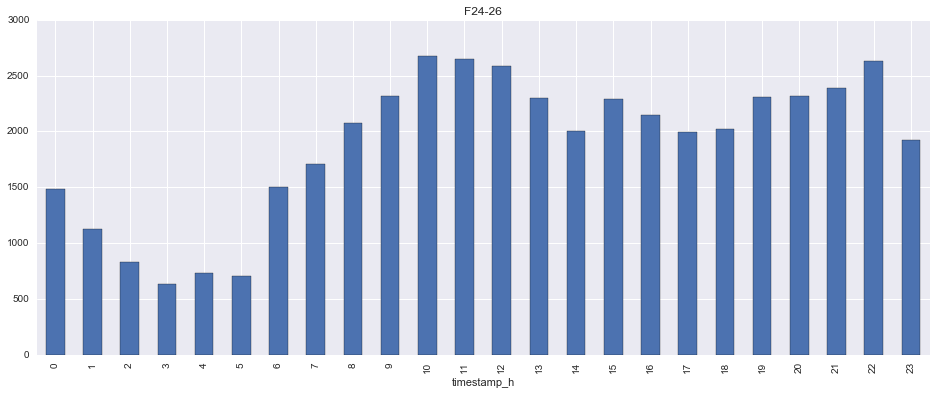

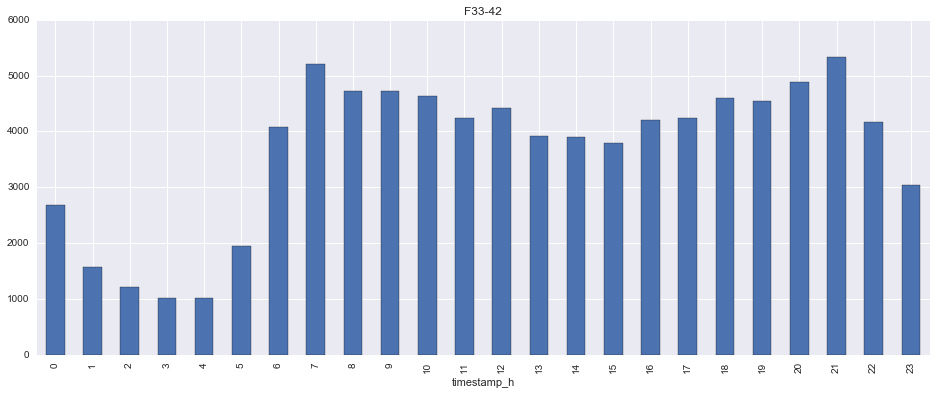

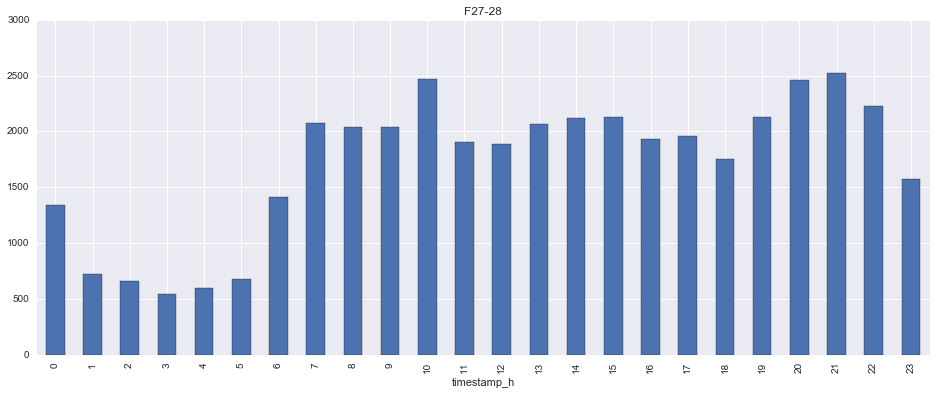

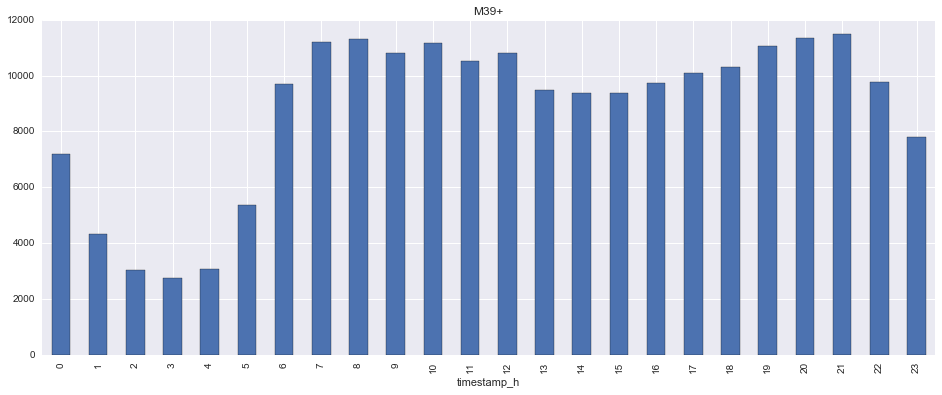

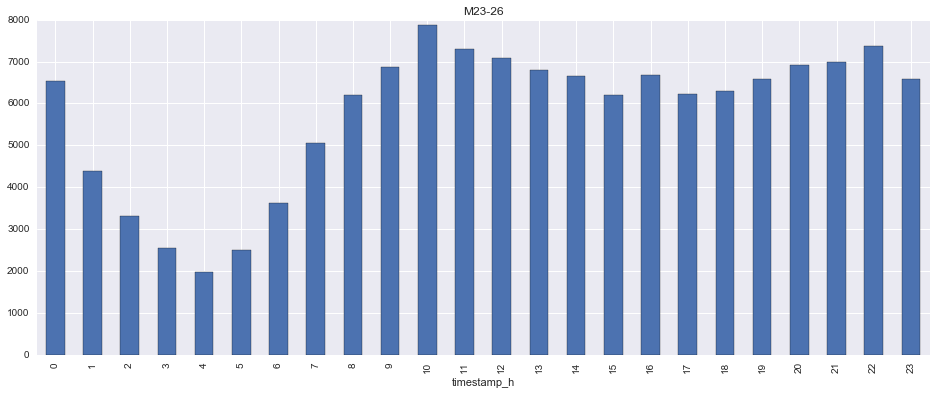

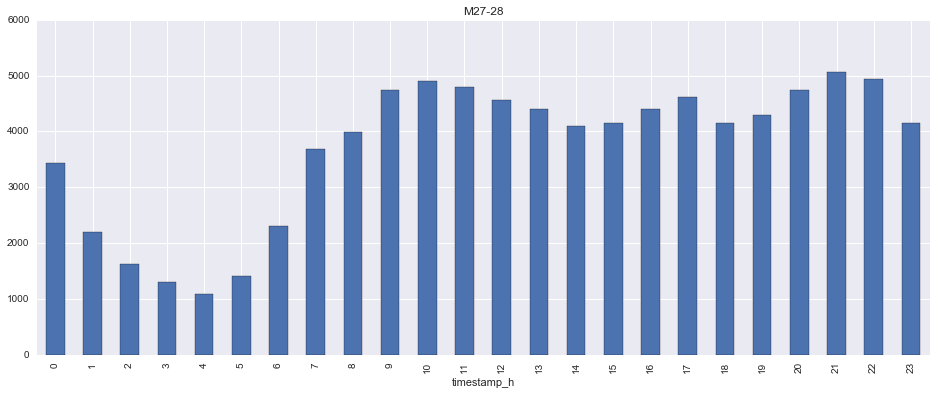

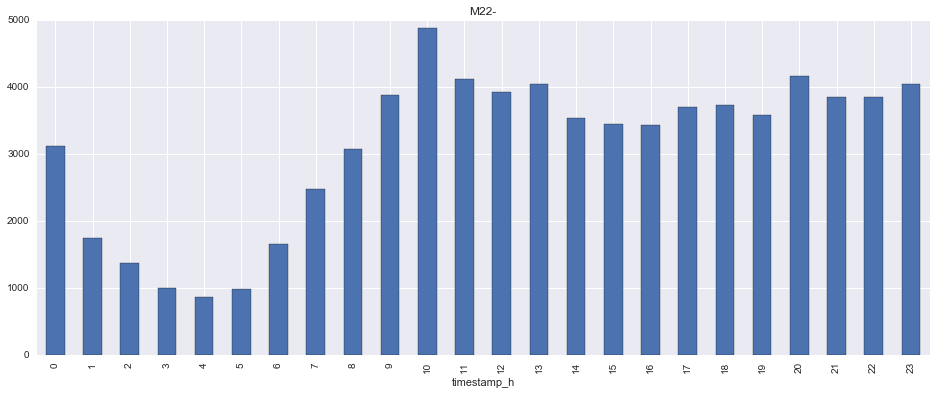

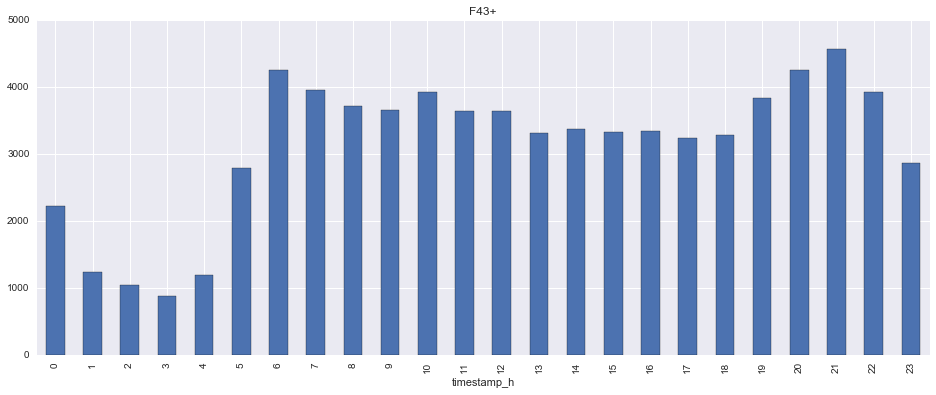

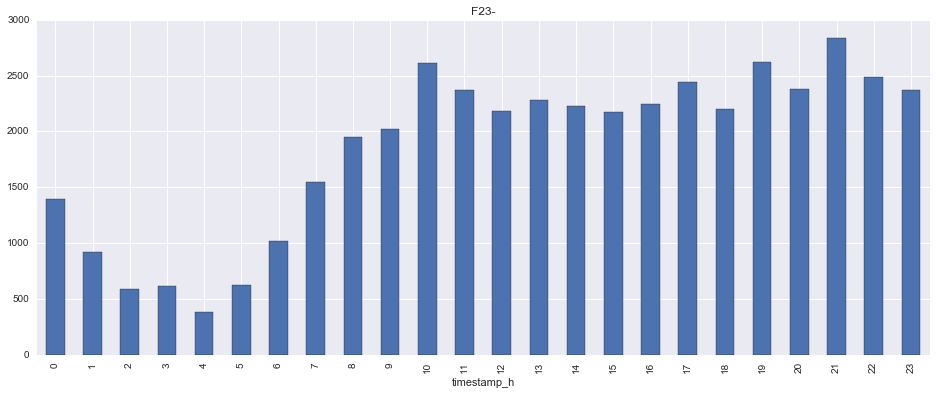

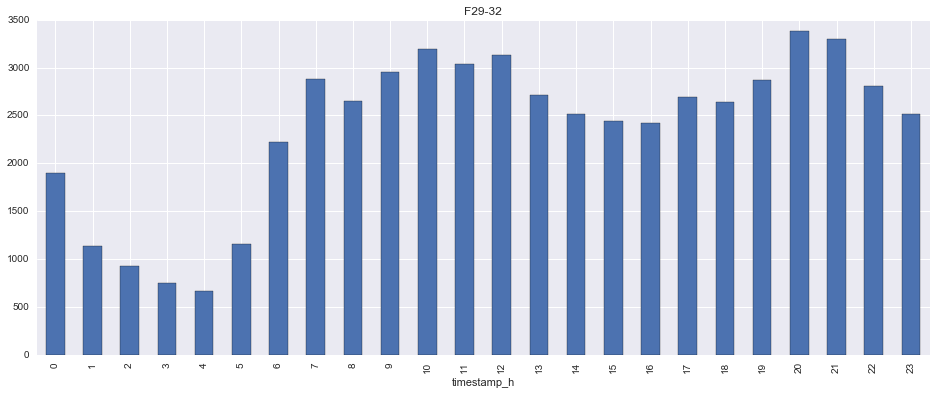

In [79]:
for g in groups:
    plt.figure()
    events_hour_per_group[g].plot(kind='bar', figsize=(16,6))
    plt.title(g)

In [83]:
events_hour_per_group = events.groupby(['group','timestamp_h']).size().unstack('group')
events_hour_mu = events.groupby(['group','timestamp_h']).size().unstack('group').mean(axis=1)
events_hour_mu.head()

timestamp_h
0    3738.666667
1    2257.500000
2    1687.333333
3    1415.916667
4    1356.833333
dtype: float64

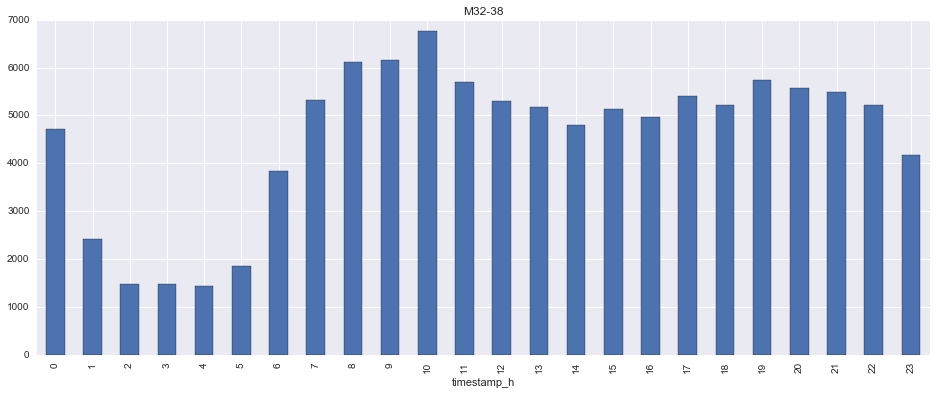

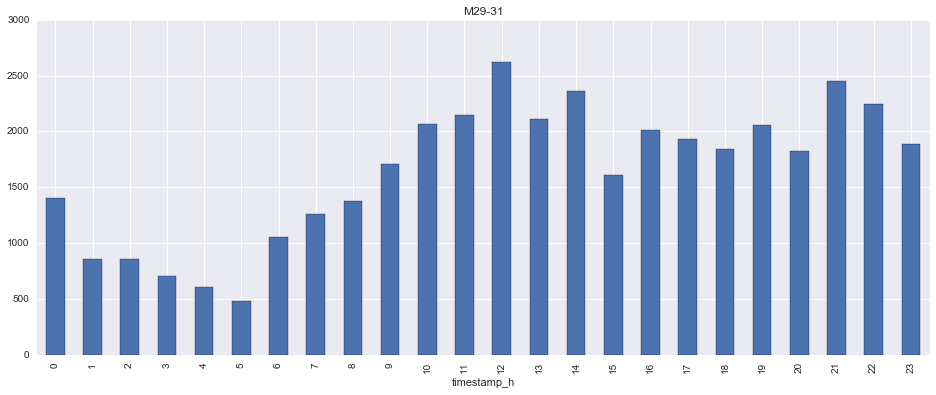

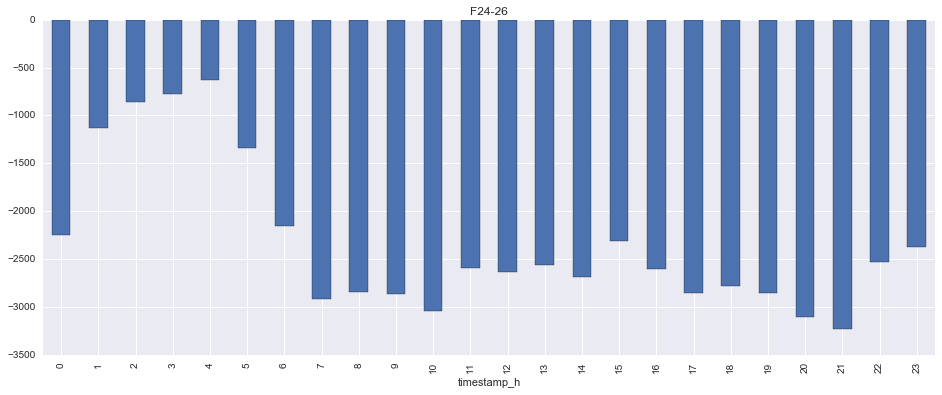

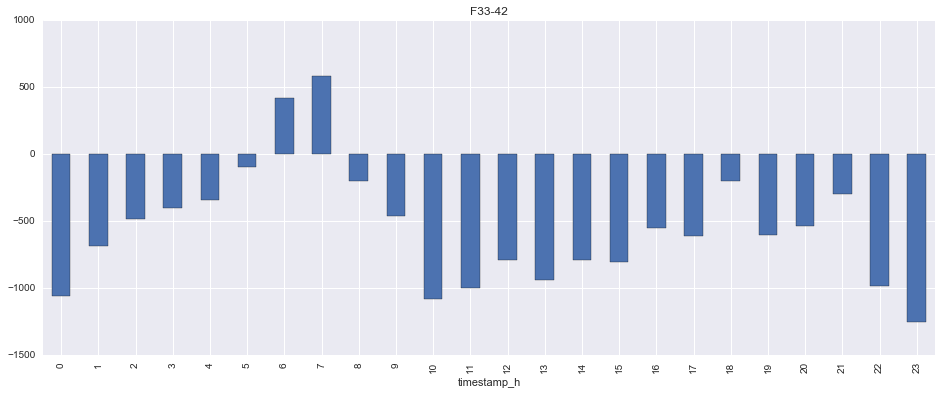

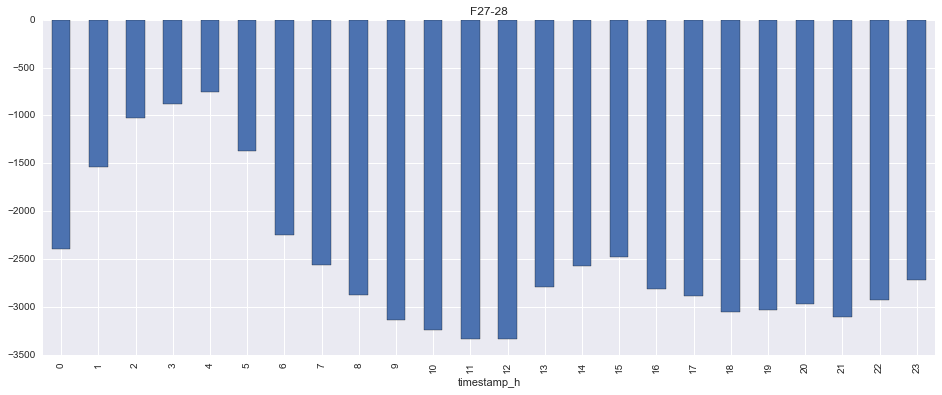

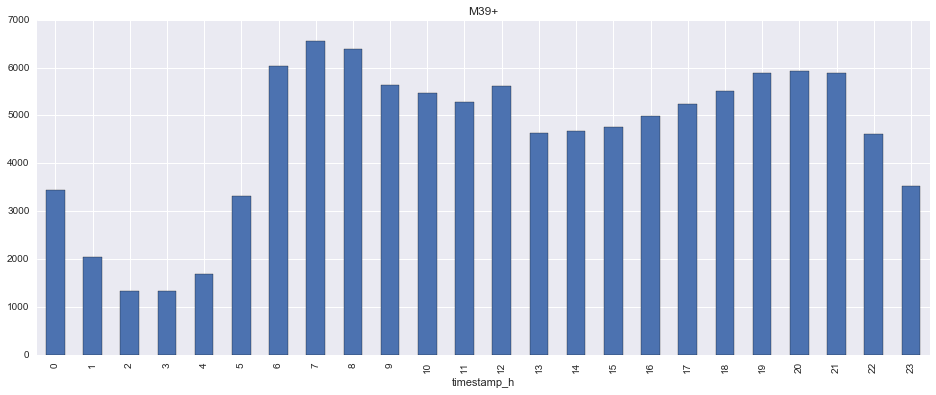

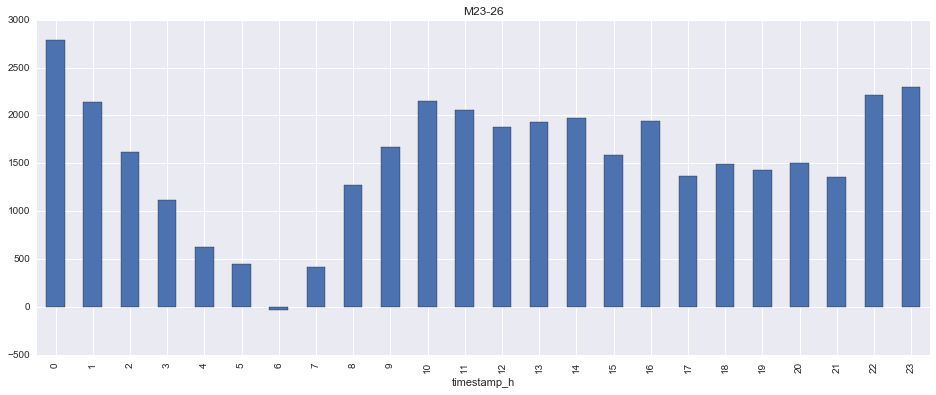

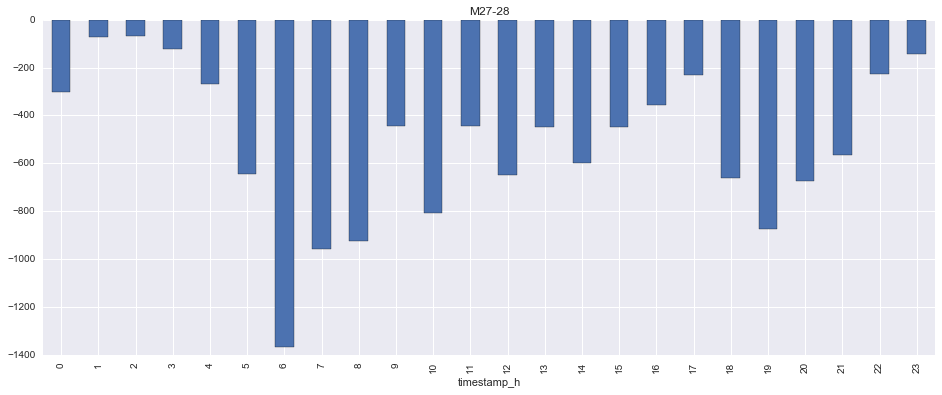

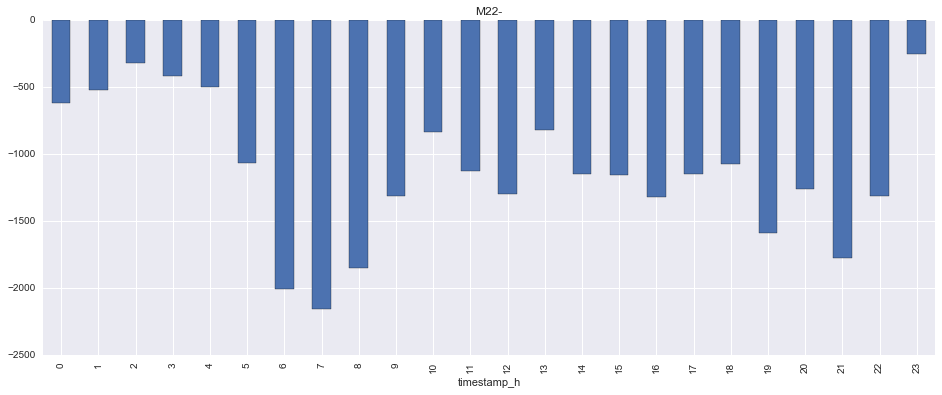

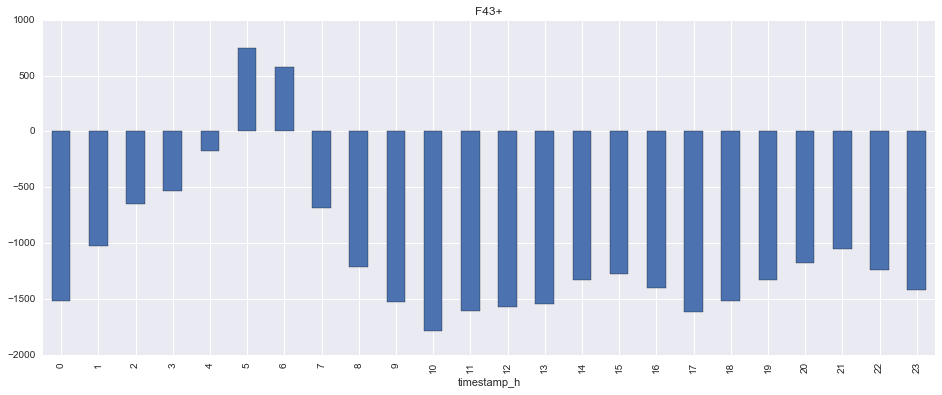

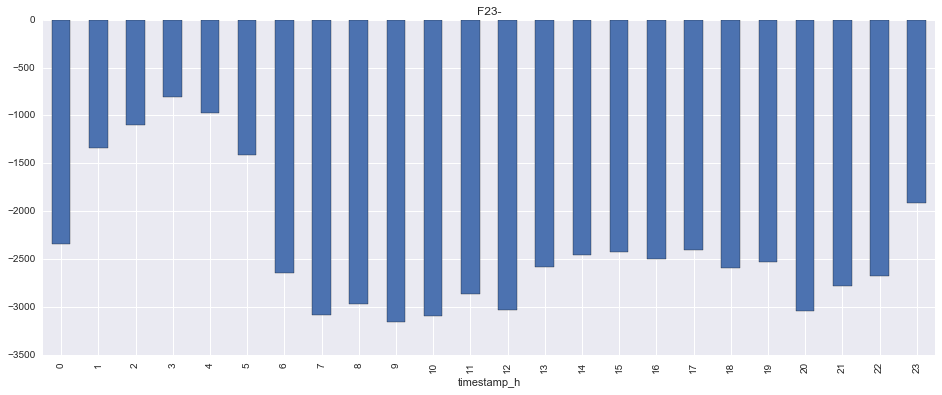

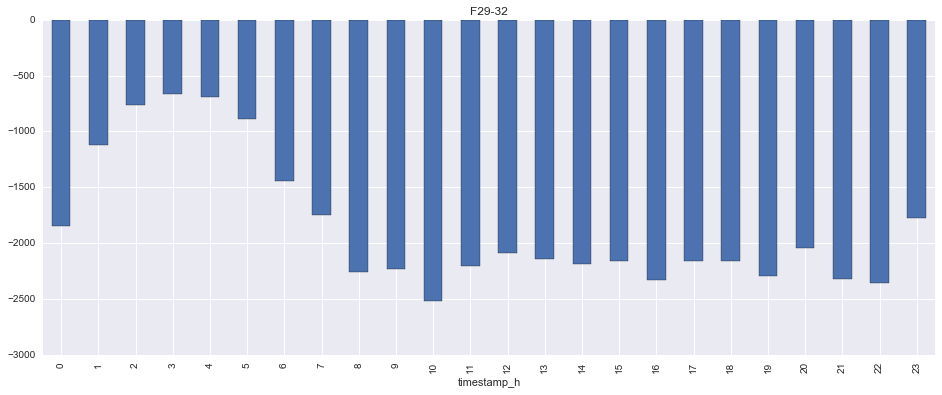

In [84]:
for g in groups:
    plt.figure()
    (events_hour_per_group[g]-events_hour_mu).plot(kind='bar', figsize=(16,6))
    plt.title(g)

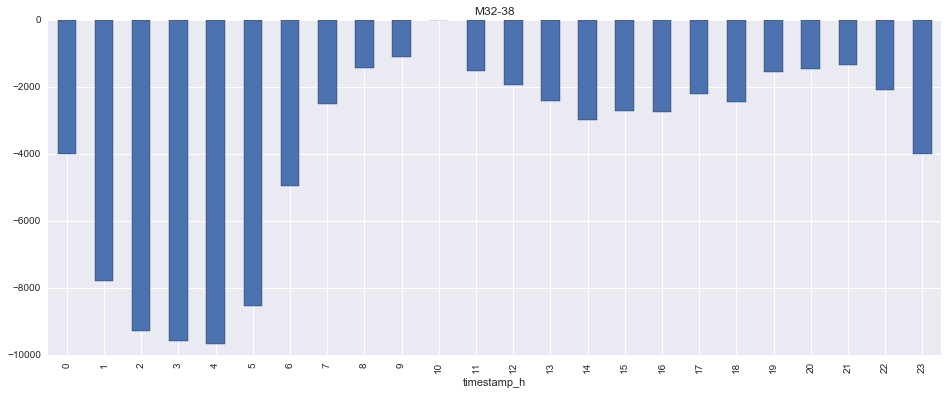

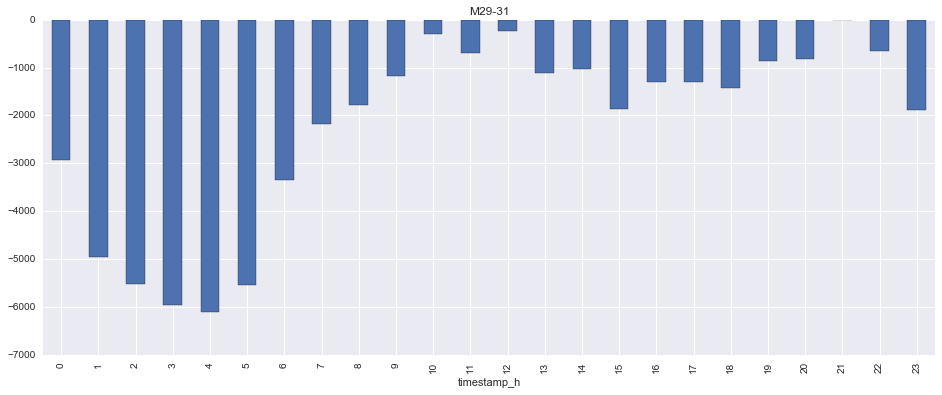

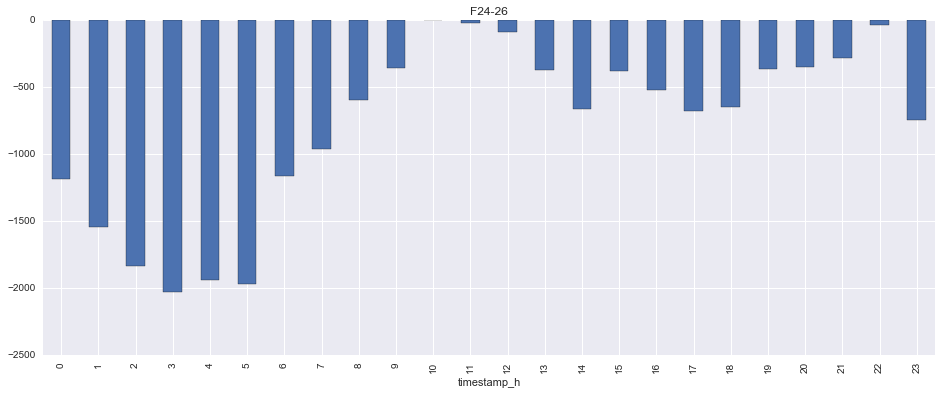

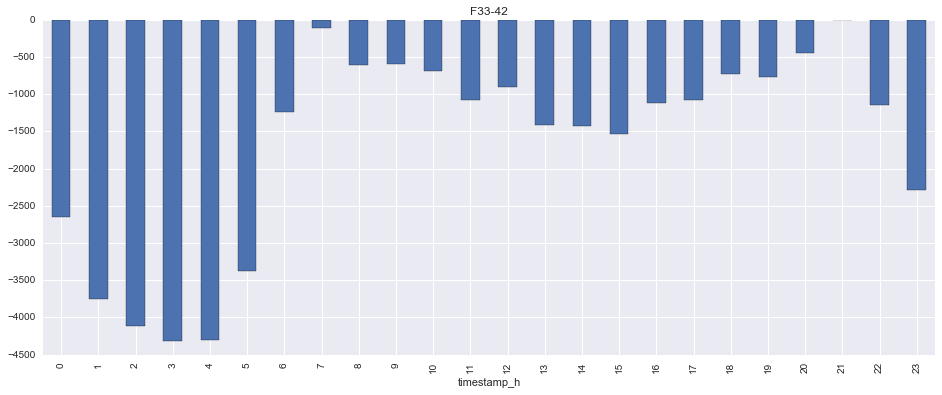

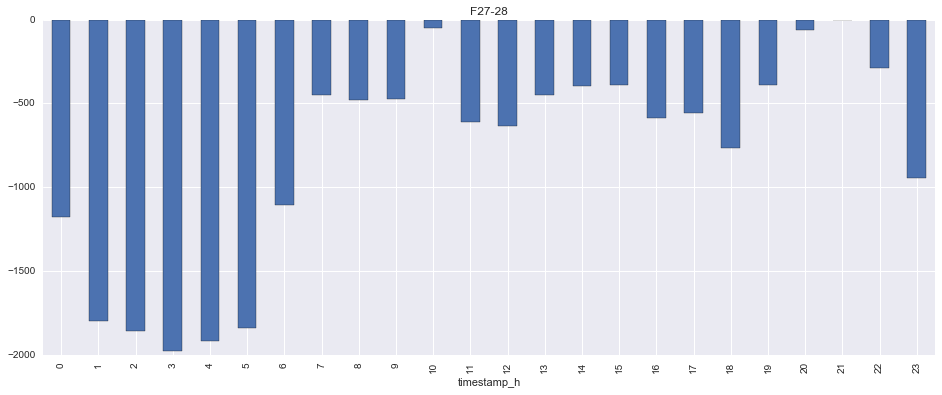

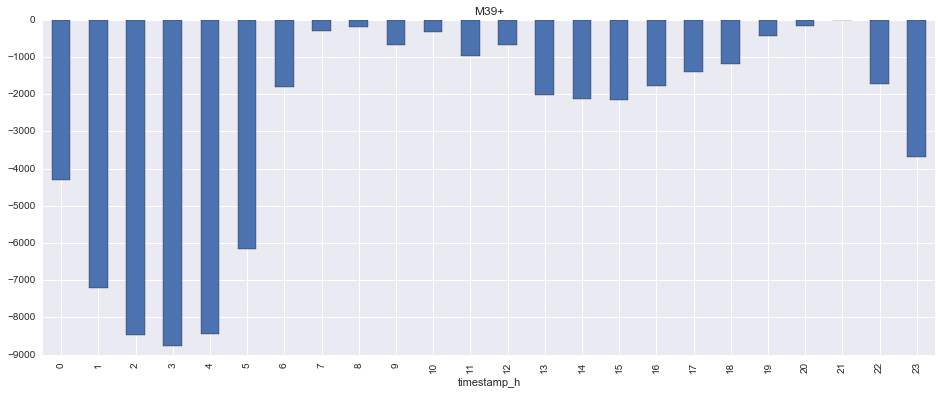

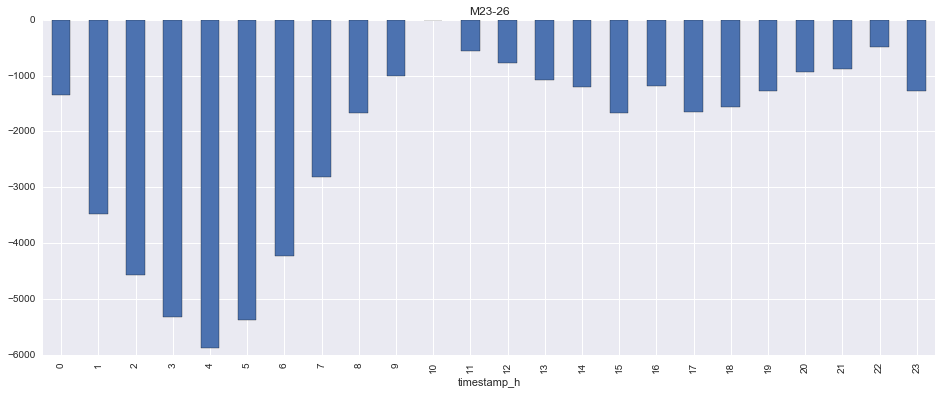

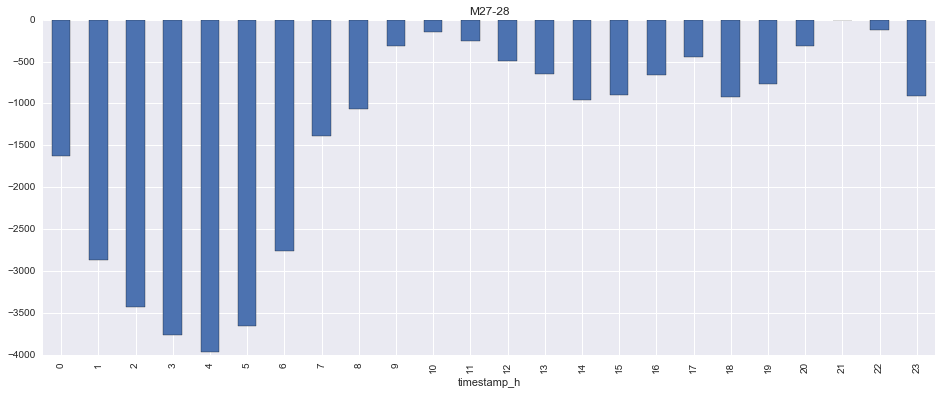

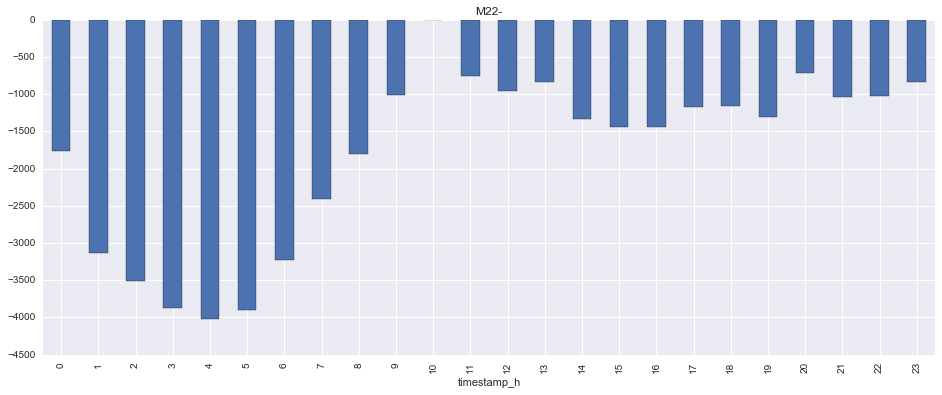

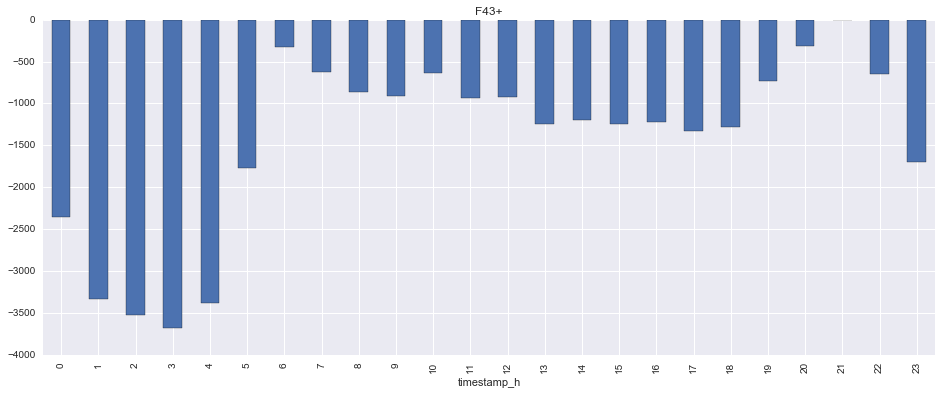

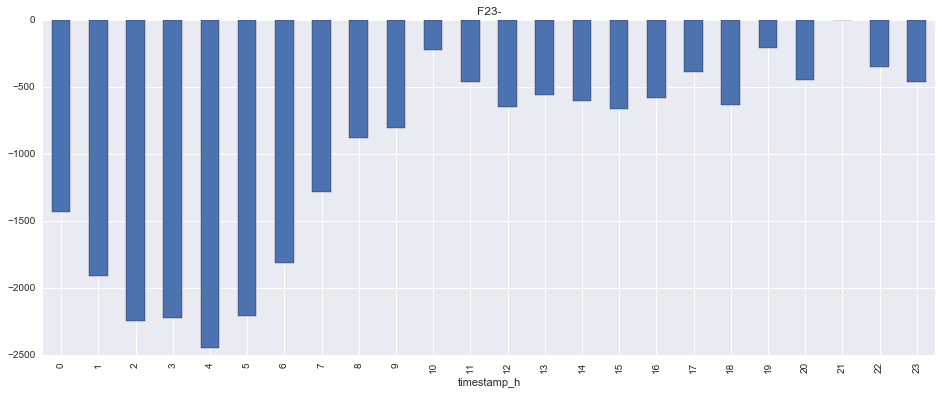

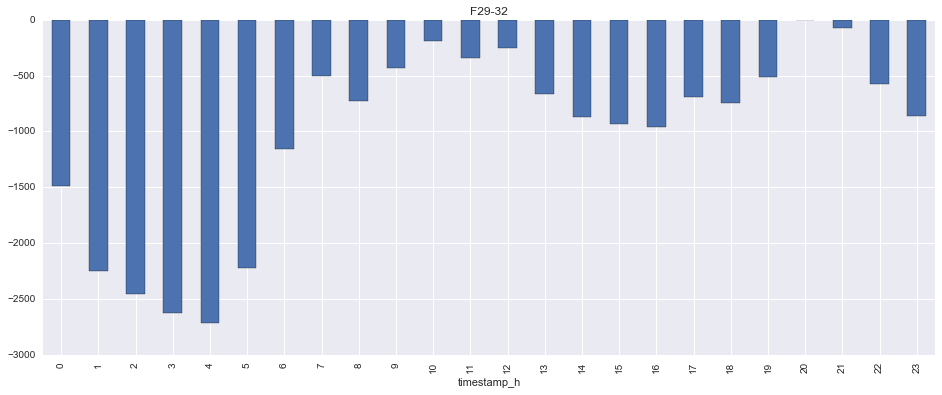

In [85]:
for g in groups:
    plt.figure()
    (events_hour_per_group[g]-events_hour_per_group[g].max()).plot(kind='bar', figsize=(16,6))
    plt.title(g)

In [87]:
events_hour_per_group.max()-events_hour_per_group.mean()

group
F23-       981.958333
F24-26     783.916667
F27-28     801.000000
F29-32    1010.708333
F33-42    1654.916667
F43+      1426.333333
M22-      1779.416667
M23-26    2096.083333
M27-28    1350.333333
M29-31    2211.541667
M32-38    3689.500000
M39+      2709.500000
dtype: float64

In [162]:
events_per_hour = events.groupby(['device_id','group','timestamp_h']).size().unstack('timestamp_h').reset_index('group')

events_per_hour.group = LabelEncoder().fit_transform(events_per_hour.group)
events_per_hour.head()

timestamp_h,group,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,5.0,22.0,NaN,NaN,NaN,NaN,4.0,6.0,NaN,3.0
-9221026417907250887,3,NaN,NaN,NaN,NaN,NaN,NaN,7.0,43.0,10.0,...,NaN,4.0,13.0,2.0,4.0,3.0,26.0,NaN,13.0,3.0
-9220830859283101130,6,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0
-9220061629197656378,11,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2.0,...,5.0,NaN,1.0,1.0,4.0,2.0,1.0,2.0,NaN,NaN
-9218960997324667698,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


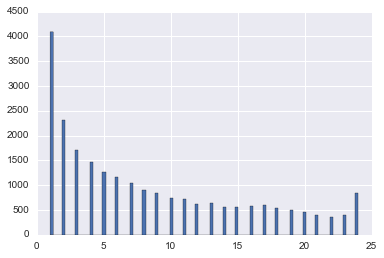

In [163]:
hours_without_events = 24-events_per_hour.isnull().sum(axis=1)
hours_without_events.hist(bins=100)

In [165]:
events_per_hour['max'] = events_per_hour.iloc[:,1:].max(axis=1)
events_per_hour['min'] = events_per_hour.iloc[:,1:].min(axis=1)
events_per_hour['mean'] = events_per_hour.iloc[:,1:].mean(axis=1)
events_per_hour['std'] = events_per_hour.iloc[:,1:].std(axis=1)
events_per_hour['n'] = 24-events_per_hour.isnull().sum(axis=1)
events_per_hour.head()

timestamp_h,group,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,max,min,mean,std,n
device_id,,,,,,,,,,,,,,,,,,,,,
-9222956879900151005,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,4.0,6.0,NaN,3.0,22.0,2.000000,8.091607,6.624804,9
-9221026417907250887,3,NaN,NaN,NaN,NaN,NaN,NaN,7.0,43.0,10.0,...,3.0,26.0,NaN,13.0,3.0,43.0,1.000000,10.974758,12.262656,16
-9220830859283101130,6,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,1.0,NaN,2.0,4.0,0.816497,2.181444,1.248423,4
-9220061629197656378,11,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2.0,...,2.0,1.0,2.0,NaN,NaN,18.0,1.000000,4.994289,5.588657,14
-9218960997324667698,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,0.942809,1.950254,1.333922,4


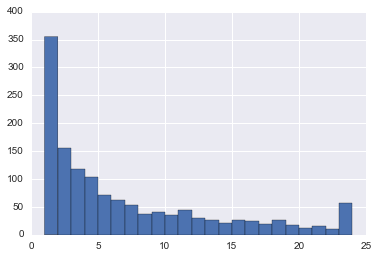

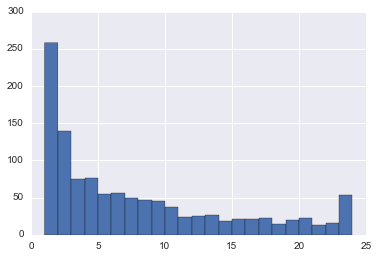

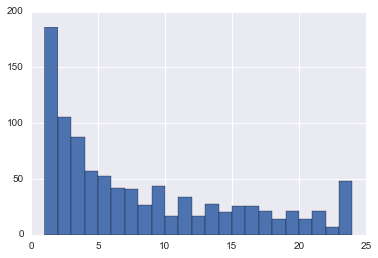

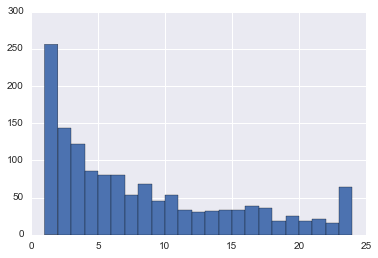

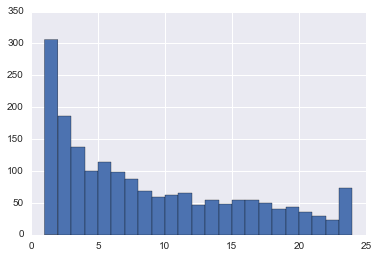

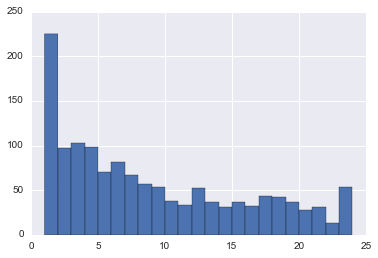

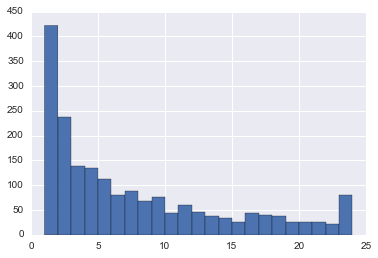

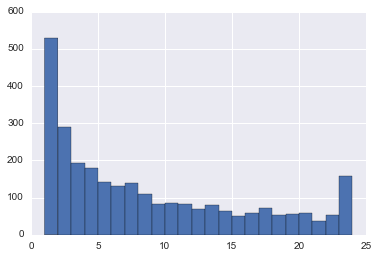

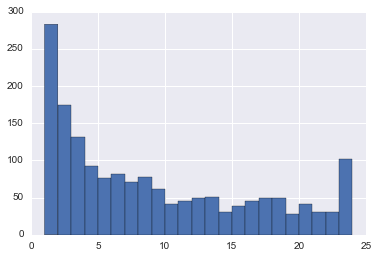

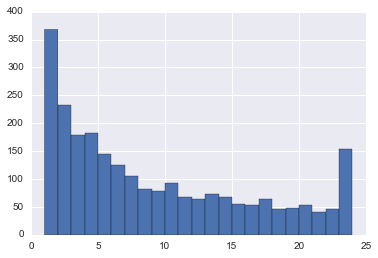

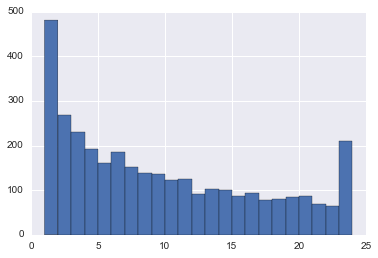

In [171]:
for i in range(11):
    plt.figure()
    events_per_hour[events_per_hour.group==i]['n'].hist(bins=23)

In [147]:
events_per_hour = events_per_hour[hours_without_events>20]

/Users/joostbloom/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


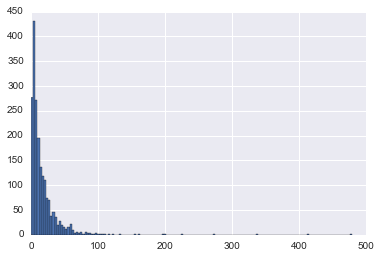

In [148]:
(events_per_hour.iloc[:,1:].max(axis=1)-events_per_hour.iloc[:,1:].mean(axis=1)).hist(bins=150)

(0, 60)

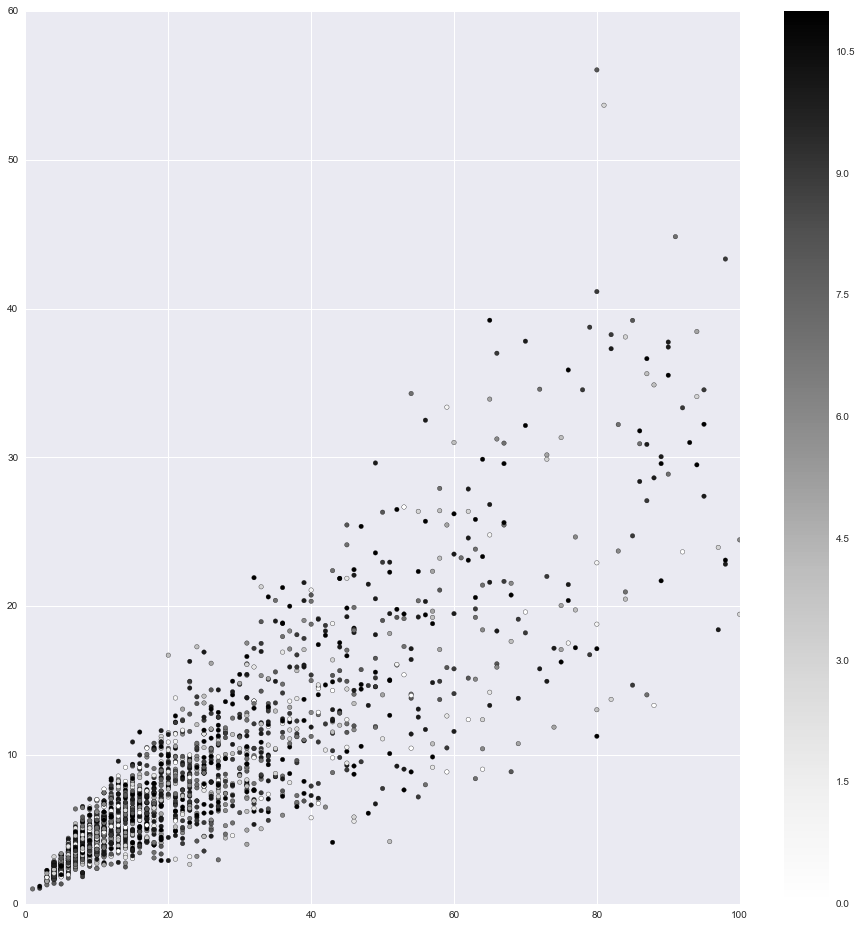

In [149]:
plt.figure( figsize=(16,16))
plt.scatter(x=events_per_hour.iloc[:,1:].max(axis=1), y=events_per_hour.iloc[:,1:].mean(axis=1),
            c=events_per_hour.group)
plt.colorbar()
plt.xlim([0,100])
plt.ylim([0,60])